# 5 Best Python Synthetic Data Generators And How to Use Them When You Lack Data
## Let's get even more data
![](images/unsplash.jpg)

<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@maxberg?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Maxim Berg</a>  
    </strong>
</figcaption>

### Introduction

In 2021, 2.5 quintillion bytes (2.5 million terabytes) of data was being produced every single day. Today, it is even more. But apparently, that's not enough because Python ecosystem has a wide range of libraries to produce synthetic data. Maybe some of them are created just for the sake of being able to generate synthetic data but most have highly useful applications such as:

- Machine learning: when real-world data is not available or difficult to obtain 
- Data privacy and security: Protect sensitive information in datasets with realistic but not actual data
- Testing and debugging: test and debug software of synthetic data in a controlled environment
- Data augmentation: artificially generating more data points from existing data using machine learning or statistics

In this article, we will see six Python libraries for the above purposes and how to use them.

### Random user information with Faker

Faker is one of the best and early Python libraries to generate all types of random information. Some commonly-used attributes Faker provides are:

- Personal info: name, birthday, email, password, address
- All types of date and timezone information
- Financial details: credit cards, SSNs, banking
- Misc: URLs, sentences, language codes

and so on. 

It has an intuitive API as well. After initiating a `Faker` class, you can generate a new fake item by calling its method:

In [12]:
from faker import Faker

fake = Faker()
fake.name()

'Sherri Poole'

In [3]:
fake.address()

'PSC 3046, Box 1296\nAPO AA 14689'

In [4]:
fake.url()

'http://www.hall.info/'

All these methods return new items on each call, so it is easy to build a fake CSV dataset with a code snippet like below:

In [5]:
import pandas as pd

df = pd.DataFrame(
    [
        {
            "name": fake.name(),
            "address": fake.address(),
            "birthday": fake.date_of_birth(),
            "email": fake.email(),
            "password": fake.password(),
        }
        for _ in range(1000)
    ]
)

df.to_csv("data/fake.csv", index=False)

In [6]:
df.sample(5)

,name,address,birthday,email,password
383,Travis Thompson,"534 Ferguson Walk\nHuynhshire, IN 84577",1967-12-27,smitheric@example.com,)Ga7Xttc*!
334,Samantha Meyers,"6181 Cobb Island\nEast Davidport, VA 62757",1957-01-12,mckinneyanne@example.net,_qv0SZ_wI1
565,Tanya Walker,"902 Medina Harbors\nGregoryport, VI 28268",1977-01-10,sfernandez@example.com,@2#QNEk79^
6,Stephanie Silva,"3792 Matthew Plaza\nElliottview, MT 54912",1956-12-04,traceygolden@example.org,qoU0ItNni#
53,Lisa Martinez,"13291 Avila Lock Suite 499\nPort Jerrybury, OK...",1953-11-20,amyramirez@example.org,^OImgob986


If you notice, name and email addresses do not match. That's one of the disadvantages of using Faker - Faker-generated datasets are easily identifiable when used in public.

Learn more about it from [the docs](https://faker.readthedocs.io/en/master/).

### Synthetic datasets with Sklearn for ML tasks

Sklearn is such a huge and excellent library that it has a dedicated support for synthetic data generation. 

Its `datasets` module includes many functions to generate artificial datasets for a variety of machine learning tasks. The most popular functions are `make_classification` and `make_regression`.

Both have `n_samples` and `n_features` parameters to control the number of rows and features of the resulting synthetic dataset. 

In [14]:
from sklearn.datasets import make_classification, make_regression

X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=15, n_classes=3, n_clusters_per_class=3
)


X, y = make_regression(n_samples=5000, n_features=20, n_informative=10)

To control the difficulty of the task, you can specify how many features are useful or redundant with `n_informative` (correlated) or `n_redundant` (linear combinations of informative features) parameters. 

`make_classification` also offers much control over the classification target, namely, the number of classes, the number of clusters per class and class weights. 

There is also the `make_blobs` function for generating clustering tasks as seen below:

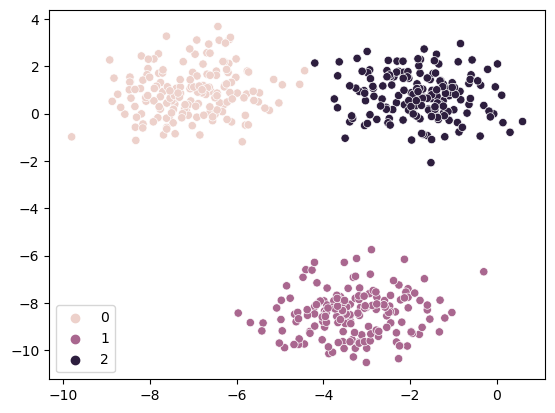

In [9]:
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2)


sns.scatterplot(X[:, 0], X[:, 1], hue=y);

If you are looking for something fancy, there are functions such as [make_checkerboard](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_checkerboard.html), [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html), [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) and [make_s_curve](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html). 

### Dataset with outliers in PyOD

Anomaly detection is a ubiquitous problem in data science. But, quality datasets with outliers are hard to come by if you want to practice. Fortunately, the Python Outlier Detection (PyOD) library has a utility function to generate a synthetic data with outliers:

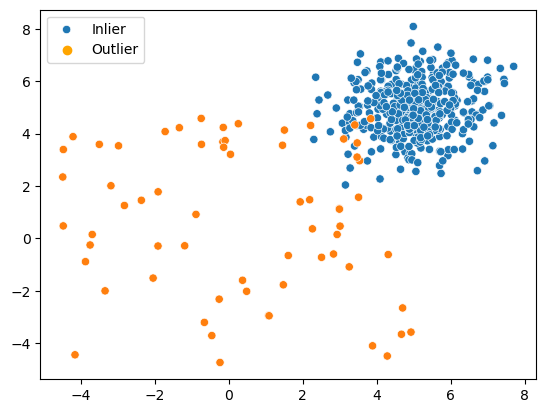

In [30]:
from pyod.utils.data import generate_data
import seaborn as sns
import matplotlib.pyplot as plt

X, y = generate_data(
    n_train=500, contamination=0.13, n_features=2, train_only=True, random_state=1
)

sns.scatterplot(X[:, 0], X[:, 1], hue=y)
legend = plt.legend(labels=['Inlier', 'Outlier'])
legend.legendHandles[1].set_color("orange")

The `generate_data` offers control over the number of rows in training and test sets, and also the percentage of outliers in the resulting sets (`contamination`).

PyOD also has the largest suite of anomaly detection algorithms in the Python ecosystem. To learn more about it, you can check out [my course](https://app.datacamp.com/learn/courses/anomaly-detection-in-python) on DataCamp.

### Synthetic data on top of another dataset with CTGAN

https://github.com/sdv-dev/CTGAN

```python
import seaborn as sns
import pandas as pd
from ctgan import CTGAN
from ctgan import load_demo

# Extract categorical data types
iris = sns.load_dataset("iris")
categoricals = iris.select_dtypes(exclude="number").columns.tolist()

# Generate the data
ctgan = CTGAN(epochs=10)
ctgan.fit(iris, categoricals)

synthetic_iris = ctgan.sample(20000)
synthetic_iris.head()
```

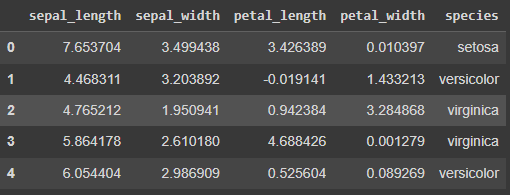

### Mimesis - Advanced Faker

https://mimesis.name/en/master/

```python
from mimesis import Generic
from mimesis.locales import Locale
from pprint import pprint

# SpaniGenericale
fake = Generic(Locale.ES)

print(dir(fake))
```

```
address     code           development  food      locale   payment  text     
binaryfile  cryptographic  file         hardware  numeric  person   transport
choice      datetime       finance      internet  path     science
```

In [11]:
from mimesis import Generic
from mimesis.locales import Locale
import pandas as pd

# Spanish locale
fake = Generic(Locale.ES)

df = pd.DataFrame(
    [
        {
            "name": fake.person.full_name(),
            "country": fake.address.country(),
            "birthday": fake.datetime.date(),
            "email": fake.person.email(),
            "password": fake.person.password(),
        }
        for _ in range(1000)
    ]
)

df.head()

,name,country,birthday,email,password
0,Xalvador Rubio,España,2006-03-16,task2064@duck.com,c~9Fa+bB
1,Eduardo Sanchez,España,2015-04-03,these1985@example.com,.D*gDFY#
2,Pàola Leon,España,2005-03-29,proteins1979@example.com,a:Z]jV9j
3,Xabat Ruiz,España,2006-10-03,factor1818@protonmail.com,wwAT'<66
4,Fanuco Montero,España,2019-05-11,your2086@example.com,A[G0fbX$


### Image augmentation with TensorFlow

```python
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
)

train_generator = train_datagen.flow_from_directory(
    "data/raw/train",
    target_size=(50, 50),
    batch_size=32,
    class_mode="categorical",
)
```

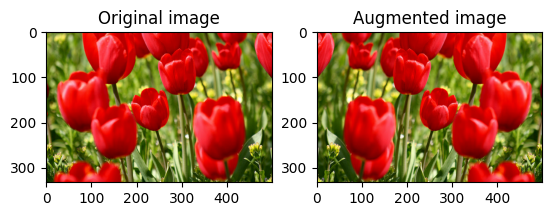

### Conclusion